In [1]:
import pandas as pd
import geopandas as gd
import contextily as ctx

In [2]:
lte_log = pd.read_csv('../data/LTE_logs/LTE_Log_2021-06-03T16:44:40', parse_dates=['time'])

In [3]:
gps_log = pd.read_csv('../data/gps_logs/2021-06-03_164623_Flagstaff.csv', parse_dates=['TimeWithMS'])
gps_log['TimeWithMS'] = gps_log['TimeWithMS'].dt.round('5s')

In [4]:
gps_log_gdf = gd.GeoDataFrame(gps_log, geometry=gd.points_from_xy(gps_log.Lng, gps_log.Lat)).set_crs("EPSG:4326").to_crs(epsg=3857)

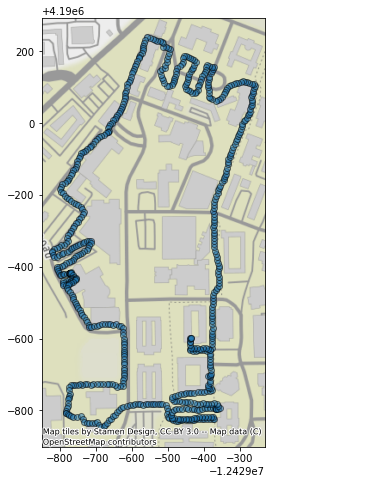

In [5]:
ax = gps_log_gdf.plot(figsize=(4,8), alpha=.5, edgecolor='k')
ctx.add_basemap(ax, zoom=16)

In [6]:
gps_log_gdf['TimeWithMS'] = gps_log_gdf['TimeWithMS'].dt.round('5s')

In [7]:
lte_log['time'] = lte_log['time'].dt.round('5s')

In [14]:
gps_lte = lte_log.set_index('time').join(gps_log.set_index('TimeWithMS'))

In [9]:
gps_lte_gdf = gd.GeoDataFrame(gps_lte, geometry=gd.points_from_xy(gps_lte.Lng, gps_lte.Lat)).set_crs("EPSG:4326").to_crs(epsg=3857)

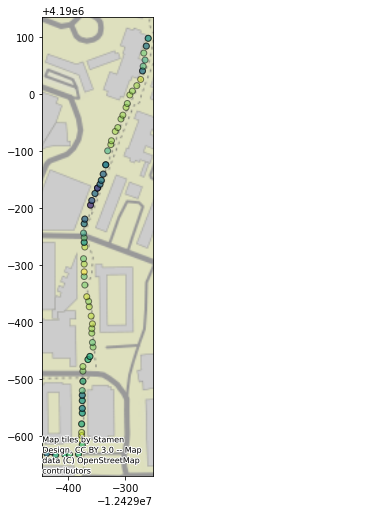

In [20]:
ax = gps_lte_gdf.plot(figsize=(2,20), alpha=.5, edgecolor='k', c=gps_lte_gdf.RXPWR)
ctx.add_basemap(ax, zoom=16)